In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.14" 2022-01-18
OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
import pandas as pd

In [ ]:
!pip install h2o

     |████████████████████████████████| 176.2 MB 75 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244303 sha256=bb0305328182553e21932a0d0d47cfea16e63211b459e49751eb24d03b9c698b
  Stored in directory: /root/.cache/pip/wheels/b5/71/a5/02087a05e5644158183e1c58eeae3f9356a4d1e80659fb2dfb
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpq2hilbj1
  JVM stdout: /tmp/tmpq2hilbj1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpq2hilbj1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_y4o7v2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Groceries_dataset2.csv'
churn_df=pd.read_csv(file_path)
churn_df=h2o.H2OFrame(churn_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df.types

{'Date': 'enum', 'Member_number': 'int', 'itemDescription': 'enum'}

In [ ]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [ ]:
churn_train

Member_number,Date,itemDescription
1808,21-07-2015,tropical fruit
2552,05-01-2015,whole milk
2300,19-09-2015,pip fruit
4941,14-02-2015,rolls/buns
4501,08-05-2015,other vegetables
3803,23-12-2015,pot plants
2762,20-03-2015,whole milk
4119,12-02-2015,tropical fruit
1340,24-02-2015,citrus fruit
1997,21-07-2015,frankfurter


In [ ]:
y= "itemDescription"
x = churn_df.columns
x.remove("Member_number")

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
17:41:19.194: Project: AutoML_1_20220311_174119
17:41:19.202: Cross-validation disabled by user: no fold column nor nfolds > 1.
17:41:19.209: Setting stopping tolerance adaptively based on the training frame: 0.006065844220905834
17:41:19.209: Build control seed: 10
17:41:19.210: training frame: Frame key: AutoML_1_20220311_174119_training_py_2_sid_8762    cols: 3    rows: 27178  chunks: 1    size: 212448  checksum: 3010322193228780074
17:41:19.210: validation frame: Frame key: py_4_sid_8762    cols: 3    rows: 5771  chunks: 1    size: 105413  checksum: 3010348879993649822
17:41:19.211: leaderboard frame: Frame key: py_4_sid_8762    cols: 3    rows: 5771  chunks: 1    size: 105413  checksum: 3010348879993649822
17:41:19.218: blending frame: NULL
17:41:19.218: response column: itemDescription
17:41:19.219: fold column: null
17:41:19.220: weights column: null
17:41:19.244: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,5775.0,14605098.0,1.0,10.0,6.919307,2.0,107.0,24.231688




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.9586572363430774
RMSE: 0.9791104311277035
LogLoss: 19.84313869828838
Mean Per-Class Error: 0.9814674980383348
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,1.000000,39 / 39
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,61.0,12.0,0.0,1.000000,234 / 234
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.000000,14 / 14
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,7.0,1.0,0.0,1.000000,22 / 22
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2 / 2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,4 / 4
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,26.0,2.0,0.0,1.000000,85 / 85
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,1.000000,10 / 10
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,6.0,0.0,1.0,0.0,120.0,18.0,0.0,0.991848,365 / 368
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,59.0,8.0,0.0,1.000000,227 / 227



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.043160
1,2,0.075539
2,3,0.103650
3,4,0.128302
4,5,0.152734
5,6,0.173486
6,7,0.191883
7,8,0.209177
8,9,0.224557
9,10,0.238502



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.9592953641856964
RMSE: 0.9794362481477272
LogLoss: 18.06478078909578
Mean Per-Class Error: 0.9393679907390924
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,8 / 8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,12.0,1.0,0.0,1.000000,38 / 38
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,5 / 5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.000000,3 / 3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,1.000000,22 / 22
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.000000,5 / 5
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,11.0,3.0,0.0,1.000000,64 / 64
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,13.0,3.0,0.0,1.000000,54 / 54



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.044013
1,2,0.077110
2,3,0.107954
3,4,0.127881
4,5,0.148674
5,6,0.169295
6,7,0.189569
7,8,0.204990
8,9,0.222492
9,10,0.237567



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-03-11 17:46:32,0.017 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-03-11 17:46:43,10.870 sec,5.0,0.979144,21.518119,0.958171,NaN,NaN,0.979494,18.728887,0.955987,NaN,NaN
2,,2022-03-11 17:46:54,21.475 sec,10.0,0.979109,20.391415,0.959524,NaN,NaN,0.979478,18.423049,0.957373,NaN,NaN
3,,2022-03-11 17:47:06,33.940 sec,15.0,0.979051,20.012457,0.959819,NaN,NaN,0.979478,18.430053,0.957893,NaN,NaN
4,,2022-03-11 17:47:20,47.454 sec,20.0,0.979071,19.894092,0.958343,NaN,NaN,0.979440,18.275031,0.955467,NaN,NaN
5,,2022-03-11 17:47:34,1 min 1.687 sec,25.0,0.979110,19.868841,0.957464,NaN,NaN,0.979429,18.274563,0.955814,NaN,NaN
6,,2022-03-11 17:47:50,1 min 17.607 sec,30.0,0.979116,19.855641,0.957648,NaN,NaN,0.979438,18.269209,0.957720,NaN,NaN
7,,2022-03-11 17:48:07,1 min 35.240 sec,35.0,0.979110,19.843139,0.956840,NaN,NaN,0.979436,18.064781,0.955987,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Date,32270.388672,1.0,1.0


In [ ]:
lb= aml.leaderboard

In [ ]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
DRF_1_AutoML_1_20220311_174119,0.939368,18.0648,0.979436,0.959295
XRT_1_AutoML_1_20220311_174119,0.939753,5.24166,0.975993,0.952563
GBM_grid_1_AutoML_1_20220311_174119_model_1,0.939922,5.54595,0.98021,0.960813
XGBoost_2_AutoML_1_20220311_174119,0.94012,4.34714,0.979959,0.960319
XGBoost_grid_1_AutoML_1_20220311_174119_model_1,0.94012,4.34766,0.979979,0.96036
XGBoost_1_AutoML_1_20220311_174119,0.94012,4.34712,0.9799,0.960203
XGBoost_grid_1_AutoML_1_20220311_174119_model_2,0.94012,4.34705,0.97998,0.960362
GLM_1_AutoML_1_20220311_174119,0.94012,4.34683,0.979881,0.960167
XGBoost_grid_1_AutoML_1_20220311_174119_model_3,0.94012,4.34792,0.980055,0.960508
XGBoost_3_AutoML_1_20220311_174119,0.940159,4.34905,0.980018,0.960436


In [ ]:
churn_pred=aml.leader.predict(churn_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_pred.head()

predict,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
whole milk,0,0,0,0,0,0,0,0,1.0228e-05,0.0314659,0,0,0.0428636,0,0,1.57076e-05,0,0,0,0,0,0,0,0,0,0,0.0480006,0.0408958,0.0382378,0,0,0,0,0,0.0340038,0,0,0,0,1.66289e-05,0,0,0,0,0,0.0392897,0,0,0,0.0464916,0,0,0,0,0,0,0,0,0,0,0,2.30531e-05,0,0.0405109,0,0,0,0,2.19498e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0393568,0,0,6.56333e-06,0,0,0,1.59986e-05,0,0,0,0,0,0,1.14848e-05,0,0,0.0409861,0.0329244,0,0,0,0,0,0.0370192,0,0,0,0,0,0,0,0,0,0,0,0,0.0405444,0.0419216,0,0,0,0,0.0471798,0,0.0817439,0.0392642,0,0.0373383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0400474,0,0,0,0,0,2.13607e-05,0,0.131506,0.028265,0
whole milk,0,0.0272709,0,0.0224945,0,0,0,0,0.0520491,0,0,0,0.0246093,0,0.0272041,1.57118e-05,0,0,0,0,0.107604,0.0251906,0,0,0,0,0,9.45811e-06,0,0,0,0,0,0,2.03341e-05,0,0,0,0,0.0238058,0,0,0,0,0,0,0,0,0,0.0274927,0,0,0,0,0,0,0,0,0,0,0,0.0290452,0,1.78398e-05,0,0,0,0,2.19556e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0179115,0,0,0,6.56508e-06,0,0,0,1.60029e-05,0,0,0.0217244,0,0,0,1.14878e-05,0,0,0.047861,0,0,0,0,0,0,0.0562443,0,0.0793124,0,0,0,0.0222464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.026813,0,0,0,0,0,0,0,0.0518763,0,0,0,0,0,0,0,0,0,0,0,0.0285215,0,0,0,0,0,0.0471574,0,0,0,0,0,0.0203857,0,0.127001,0.0860604,0
soda,0,0,0,0,0,0,0.0297293,0,0.0548968,0,0,0.0246789,0.0449171,0,0.0259611,1.57079e-05,0,0,0,0,0.0254171,0,0,0,0,0,0.0273889,0.030176,0,0,0,0,0,0,2.0329e-05,0,0,0,0,1.66292e-05,0,0,0,0,0,0,0,0,0,9.36942e-06,0,0,0,0,0,0,0,0,0,0.0546256,0,2.30535e-05,0,0.0486992,0,0,0,0.029814,2.19501e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0245843,0,0.0554645,0,1.59989e-05,0,0,0,0,0,0.0263094,0.0231184,0,0,0.0798391,0,0,0,0,0,0,0.0202174,0.0333215,0,0,0,0,0,0,0,0,0.02335,0,0,0.0521607,0,0,0,0,0,0,0,0.029121,0,0,0,0,0,0,0,0.0842356,0,0,0,0,0,0,0.0281842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.024782,0,2.13611e-05,0,0.0744593,0.0244039,0
rolls/buns,0,0.0313605,0,0,0,0,0.0294132,0,1.02306e-05,0.025961,0,0,0.0496978,0,0.0250149,0.0226633,0,0,0,0,0,0,0,0.0272151,0,0,0,9.45798e-06,0.0489234,0,0,0

predict,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
whole milk,0,0,0,0,0,0,0,0,1.0228e-05,0.0314659,0,0,0.0428636,0,0,1.57076e-05,0,0,0,0,0,0,0,0,0,0,0.0480006,0.0408958,0.0382378,0,0,0,0,0,0.0340038,0,0,0,0,1.66289e-05,0,0,0,0,0,0.0392897,0,0,0,0.0464916,0,0,0,0,0,0,0,0,0,0,0,2.30531e-05,0,0.0405109,0,0,0,0,2.19498e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0393568,0,0,6.56333e-06,0,0,0,1.59986e-05,0,0,0,0,0,0,1.14848e-05,0,0,0.0409861,0.0329244,0,0,0,0,0,0.0370192,0,0,0,0,0,0,0,0,0,0,0,0,0.0405444,0.0419216,0,0,0,0,0.0471798,0,0.0817439,0.0392642,0,0.0373383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0400474,0,0,0,0,0,2.13607e-05,0,0.131506,0.028265,0
whole milk,0,0.0272709,0,0.0224945,0,0,0,0,0.0520491,0,0,0,0.0246093,0,0.0272041,1.57118e-05,0,0,0,0,0.107604,0.0251906,0,0,0,0,0,9.45811e-06,0,0,0,0,0,0,2.03341e-05,0,0,0,0,0.0238058,0,0,0,0,0,0,0,0,0,0.0274927,0,0,0,0,0,0,0,0,0,0,0,0.0290452,0,1.78398e-05,0,0,0,0,2.19556e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0179115,0,0,0,6.56508e-06,0,0,0,1.60029e-05,0,0,0.0217244,0,0,0,1.14878e-05,0,0,0.047861,0,0,0,0,0,0,0.0562443,0,0.0793124,0,0,0,0.0222464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.026813,0,0,0,0,0,0,0,0.0518763,0,0,0,0,0,0,0,0,0,0,0,0.0285215,0,0,0,0,0,0.0471574,0,0,0,0,0,0.0203857,0,0.127001,0.0860604,0
soda,0,0,0,0,0,0,0.0297293,0,0.0548968,0,0,0.0246789,0.0449171,0,0.0259611,1.57079e-05,0,0,0,0,0.0254171,0,0,0,0,0,0.0273889,0.030176,0,0,0,0,0,0,2.0329e-05,0,0,0,0,1.66292e-05,0,0,0,0,0,0,0,0,0,9.36942e-06,0,0,0,0,0,0,0,0,0,0.0546256,0,2.30535e-05,0,0.0486992,0,0,0,0.029814,2.19501e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0245843,0,0.0554645,0,1.59989e-05,0,0,0,0,0,0.0263094,0.0231184,0,0,0.0798391,0,0,0,0,0,0,0.0202174,0.0333215,0,0,0,0,0,0,0,0,0.02335,0,0,0.0521607,0,0,0,0,0,0,0,0.029121,0,0,0,0,0,0,0,0.0842356,0,0,0,0,0,0,0.0281842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.024782,0,2.13611e-05,0,0.0744593,0.0244039,0
rolls/buns,0,0.0313605,0,0,0,0,0.0294132,0,1.02306e-05,0.025961,0,0,0.0496978,0,0.0250149,0.0226633,0,0,0,0,0,0,0,0.0272151,0,0,0,9.45798e-06,0.0489234,0,0,0

In [ ]:
aml.leader.model_performance(churn_test)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.9576314549219925
RMSE: 0.9785864575611051
LogLoss: 17.915573459793574
Mean Per-Class Error: 0.9575164061056228
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.000000,13 / 13
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,3.0,0.0,1.000000,51 / 51
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.000000,3 / 3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,4 / 4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1 / 1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.000000,15 / 15
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,2 / 2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,22.0,9.0,0.0,0.988095,83 / 84
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,13.0,2.0,0.0,1.000000,46 / 46



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.046939
1,2,0.078232
2,3,0.107978
3,4,0.131878
4,5,0.153370
5,6,0.175722
6,7,0.193604
7,8,0.212517
8,9,0.229023
9,10,0.242779


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['DRF_1_AutoML_1_20220311_174119',
 'XRT_1_AutoML_1_20220311_174119',
 'GBM_grid_1_AutoML_1_20220311_174119_model_1',
 'XGBoost_2_AutoML_1_20220311_174119',
 'XGBoost_grid_1_AutoML_1_20220311_174119_model_1',
 'XGBoost_1_AutoML_1_20220311_174119',
 'XGBoost_grid_1_AutoML_1_20220311_174119_model_2',
 'GLM_1_AutoML_1_20220311_174119',
 'XGBoost_grid_1_AutoML_1_20220311_174119_model_3',
 'XGBoost_3_AutoML_1_20220311_174119']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_1_20220311_174119


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.9594165619513734
RMSE: 0.9794981173802089
LogLoss: 4.331672370595515
Mean Per-Class Error: 0.9820359281437125
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,1.0,39 / 39
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,234.0,0.0,0.0,1.0,234 / 234
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,1.0,14 / 14
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,1.0,22 / 22
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2 / 2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,4 / 4
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,1.0,85 / 85
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,10 / 10
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,368.0,0.0,0.0,1.0,368 / 368
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,227.0,0.0,0.0,1.0,227 / 227



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.065053
1,2,0.115130
2,3,0.159062
3,4,0.197770
4,5,0.233056
5,6,0.260946
6,7,0.287843
7,8,0.312532
8,9,0.336338
9,10,0.356354



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.9603189855417834
RMSE: 0.9799586652210304
LogLoss: 4.347141786703896
Mean Per-Class Error: 0.9401197604790419
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,8 / 8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,1.0,38 / 38
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,5 / 5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,3 / 3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,1.0,22 / 22
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,5 / 5
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,1.0,64 / 64
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,1.0,54 / 54



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.059782
1,2,0.103622
2,3,0.149887
3,4,0.188182
4,5,0.219199
5,6,0.246751
6,7,0.273609
7,8,0.299082
8,9,0.324900
9,10,0.347253



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-03-11 17:45:51,0.015 sec,0.0,0.994012,5.117994,0.996100,NaN,NaN,0.994012,5.117994,0.996188,NaN,NaN
1,,2022-03-11 17:45:57,5.487 sec,5.0,0.985113,4.478557,0.934947,NaN,NaN,0.985424,4.492666,0.940218,NaN,NaN
2,,2022-03-11 17:46:02,11.190 sec,10.0,0.981975,4.375589,0.934947,NaN,NaN,0.982365,4.389904,0.940218,NaN,NaN
3,,2022-03-11 17:46:08,17.094 sec,15.0,0.980562,4.344991,0.934947,NaN,NaN,0.980988,4.359906,0.940218,NaN,NaN
4,,2022-03-11 17:46:15,23.484 sec,20.0,0.979949,4.335583,0.934947,NaN,NaN,0.980398,4.350833,0.940218,NaN,NaN
5,,2022-03-11 17:46:21,30.383 sec,25.0,0.979647,4.332563,0.934947,NaN,NaN,0.980101,4.347655,0.940218,NaN,NaN
6,,2022-03-11 17:46:28,37.018 sec,30.0,0.979498,4.331672,0.934947,NaN,NaN,0.979959,4.347142,0.940218,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Date.06-06-2015,4.290560,1.000000,0.373372
1,Date.11-10-2015,1.275583,0.297300,0.111003
2,Date.29-11-2015,1.020928,0.237947,0.088843
3,Date.21-07-2015,0.799547,0.186350,0.069578
4,Date.20-03-2015,0.741635,0.172853,0.064538
5,Date.30-04-2015,0.670982,0.156386,0.058390
6,Date.30-05-2014,0.641692,0.149559,0.055841
7,Date.19-06-2015,0.537807,0.125346,0.046801
8,Date.26-03-2015,0.526879,0.122800,0.045850
9,Date.28-07-2015,0.390031,0.090905,0.033941


In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'multinomial',
  'default': 'AUT

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'num_class': 167,
  'objective': 'multi:softprob',
  'seed': 13,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [ ]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_1_20220311_174119


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.9594165619513734
RMSE: 0.9794981173802089
LogLoss: 4.331672370595515
Mean Per-Class Error: 0.9820359281437125
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,1.0,39 / 39
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,234.0,0.0,0.0,1.0,234 / 234
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,1.0,14 / 14
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,1.0,22 / 22
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2 / 2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,4 / 4
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,1.0,85 / 85
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,10 / 10
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,368.0,0.0,0.0,1.0,368 / 368
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,227.0,0.0,0.0,1.0,227 / 227



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.065053
1,2,0.115130
2,3,0.159062
3,4,0.197770
4,5,0.233056
5,6,0.260946
6,7,0.287843
7,8,0.312532
8,9,0.336338
9,10,0.356354



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.9603189855417834
RMSE: 0.9799586652210304
LogLoss: 4.347141786703896
Mean Per-Class Error: 0.9401197604790419
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,8 / 8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,1.0,38 / 38
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,5 / 5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,3 / 3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,1.0,22 / 22
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,5 / 5
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,1.0,64 / 64
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,1.0,54 / 54



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.059782
1,2,0.103622
2,3,0.149887
3,4,0.188182
4,5,0.219199
5,6,0.246751
6,7,0.273609
7,8,0.299082
8,9,0.324900
9,10,0.347253



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-03-11 17:45:51,0.015 sec,0.0,0.994012,5.117994,0.996100,NaN,NaN,0.994012,5.117994,0.996188,NaN,NaN
1,,2022-03-11 17:45:57,5.487 sec,5.0,0.985113,4.478557,0.934947,NaN,NaN,0.985424,4.492666,0.940218,NaN,NaN
2,,2022-03-11 17:46:02,11.190 sec,10.0,0.981975,4.375589,0.934947,NaN,NaN,0.982365,4.389904,0.940218,NaN,NaN
3,,2022-03-11 17:46:08,17.094 sec,15.0,0.980562,4.344991,0.934947,NaN,NaN,0.980988,4.359906,0.940218,NaN,NaN
4,,2022-03-11 17:46:15,23.484 sec,20.0,0.979949,4.335583,0.934947,NaN,NaN,0.980398,4.350833,0.940218,NaN,NaN
5,,2022-03-11 17:46:21,30.383 sec,25.0,0.979647,4.332563,0.934947,NaN,NaN,0.980101,4.347655,0.940218,NaN,NaN
6,,2022-03-11 17:46:28,37.018 sec,30.0,0.979498,4.331672,0.934947,NaN,NaN,0.979959,4.347142,0.940218,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Date.06-06-2015,4.290560,1.000000,0.373372
1,Date.11-10-2015,1.275583,0.297300,0.111003
2,Date.29-11-2015,1.020928,0.237947,0.088843
3,Date.21-07-2015,0.799547,0.186350,0.069578
4,Date.20-03-2015,0.741635,0.172853,0.064538
5,Date.30-04-2015,0.670982,0.156386,0.058390
6,Date.30-05-2014,0.641692,0.149559,0.055841
7,Date.19-06-2015,0.537807,0.125346,0.046801
8,Date.26-03-2015,0.526879,0.122800,0.045850
9,Date.28-07-2015,0.390031,0.090905,0.033941


In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

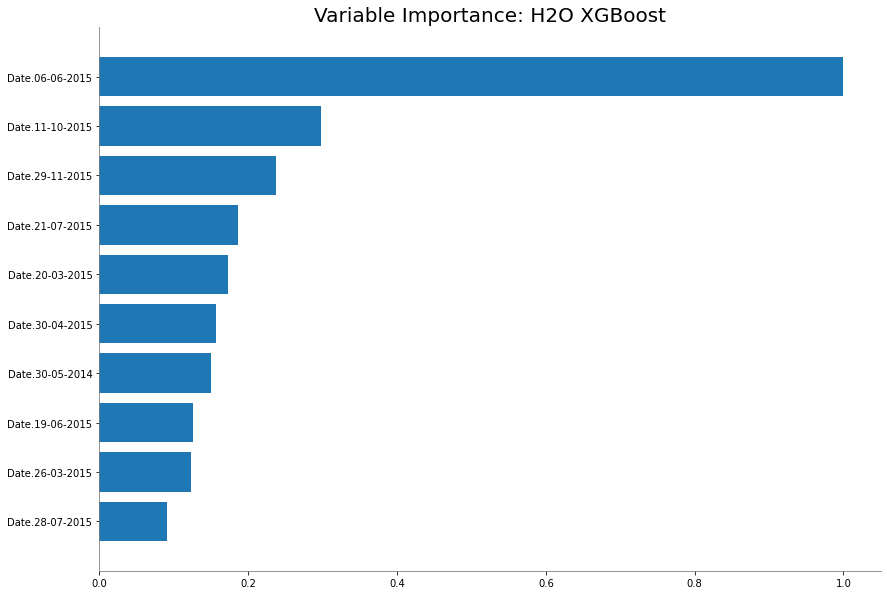

<Figure size 432x288 with 0 Axes>

In [ ]:
out.varimp_plot()